The points detected from a person


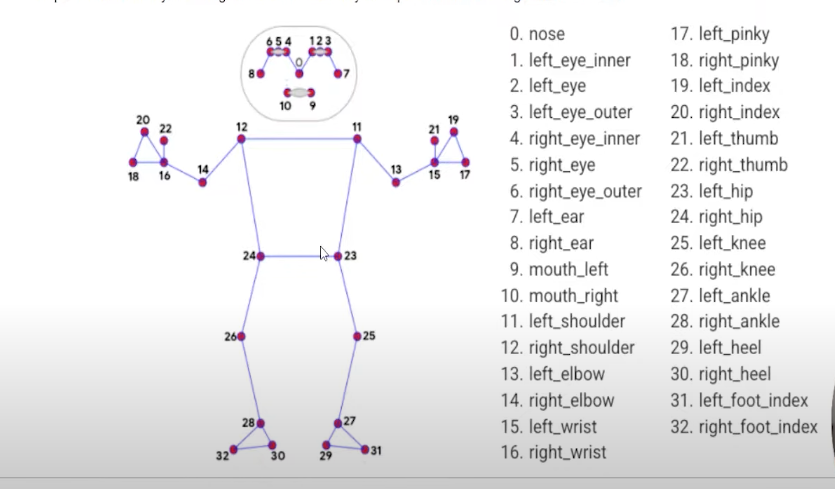


- static_image_mode It is a boolean value that is if set to False, the detector is only invoked as needed, that is in the very first frame or when the tracker loses track. If set to True, the person detector is invoked on every input image. So you should probably set this value to True when working with a bunch of unrelated images not videos. Its default value is False.

- ⚫ min_detection_confidence - It is the minimum detection confidence with range (0.0, 1.0) required to consider the person-detection model's prediction correct. Its default value is 0.5. This means if the detector has a prediction confidence of greater or equal to 50% then it will be considered as a positive detection
- 
.min_tracking_confidence - It is the minimum tracking confidence ([0.0, 1.0]) required to consider the landmark-tracking model's tracked pose landmarks valid.
If the confidence is less than the set value then the detector is invoked again in the next frame/image, so increasing its value increases the robustness, but also increases the latency. Its default value is 0
 .-.
⚫ model_complexity - It is the complexity of the pose landmark model. As there are three different models to choose from so the possible values are 1, or 2. The higher the value, the more accurate the results are, but at the expense of higher latency. Its default value i
s- .
• smooth_landmarks - It is a boolean value that is if set to True, pose landmarks across different frames are filtered to reduce noise. But only works when static_image_mode is also set to False. Its default value is True.

In [4]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

ImportError: DLL load failed while importing _framework_bindings: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (DLL).

In [10]:
# initializing medipipe class
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

mp_drawing = mp.solutions.drawing_utils


**Read an image**

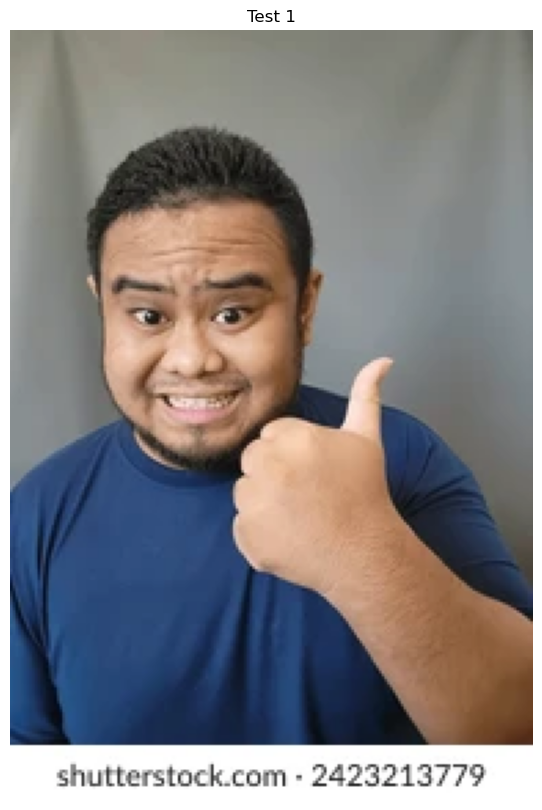

In [47]:
sample_img = cv2.imread('./images/test5.jpg')

plt.figure(figsize = [10,10])

plt.title("Test 1")
plt.axis('off')
plt.imshow(sample_img[:,:,::-1])
plt.show()

**Pose detection**

In [48]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:

    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.359334111
y: 0.424154401
z: -1.02789557
visibility: 0.999860644

LEFT_EYE_INNER:
x: 0.40809691
y: 0.364859879
z: -0.96747005
visibility: 0.999734



**Adapt to the real size of the image and not the normalized values**

In [35]:
image_height, image_width, _ = sample_img.shape
# Retrieve the height and width of the sample image. image_height, image_width, = sample_img.shape
# Check if any Landmarks are found.

if results.pose_landmarks:
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        # Display the found landmarks after converting them into their original scale. 
        print (f' {mp_pose.PoseLandmark(i).name}:')
        print (f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}') 
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}') 
        print(f'z: {results.pose_landmarks.landmark[mp_pose. PoseLandmark(i).value].z* image_width}') 
        print (f'visibility: {results.pose_landmarks.landmark[mp_pose. PoseLandmark(i).value].visibility}\n')

 NOSE:
x: 176.06478881835938
y: 75.76684355735779
z: -160.3553123474121
visibility: 0.9967106580734253

 LEFT_EYE_INNER:
x: 173.15286254882812
y: 66.22447371482849
z: -148.7117156982422
visibility: 0.9894709587097168



**Make the pose detection**

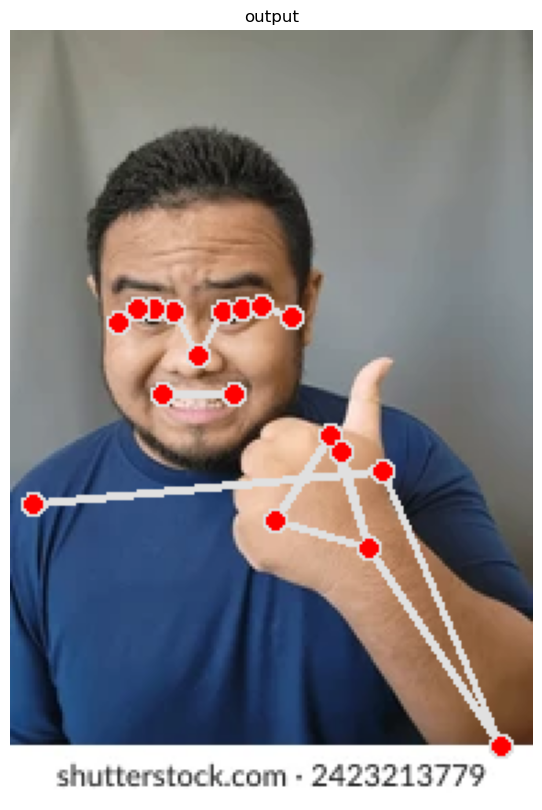

In [49]:
img_copy = sample_img.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    fig = plt.figure(figsize = [10,10])

    plt.title("output")
    plt.axis('off')
    plt.imshow(img_copy[:,:,::-1])
    plt.show()


**Make the 3d version where there is depth**

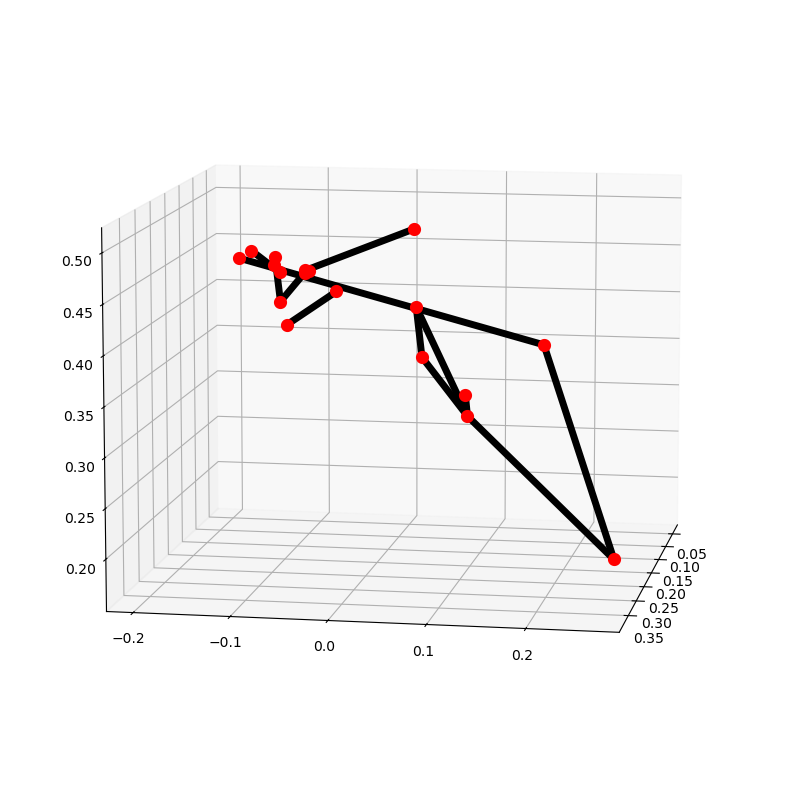

In [50]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [71]:
def detectPose(image, pose, display=True):
    sample_img = cv2.imread(image)

    plt.figure(figsize = [10,10])
    height, width, _ = sample_img.shape

    landmarks = []

    results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    output_img = sample_img.copy()

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_img, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

        for landmark in results.pose_landmarks.landmark:
            landmarks.append((int(landmark.x*width), (int(landmark.y*height)), (landmark.z * width)))

    if display:
        fig = plt.figure(figsize = [10,10])
    
        plt.subplot(121); plt.imshow(sample_img[:,:,::-1]); plt.title("Original image"); plt.axis('off');
        plt.subplot(122); plt.imshow(output_img[:,:,::-1]); plt.title("Output image"); plt.axis('off');
        
        plt.show()

        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        return landmarks, output_img
    



<Figure size 1000x1000 with 0 Axes>

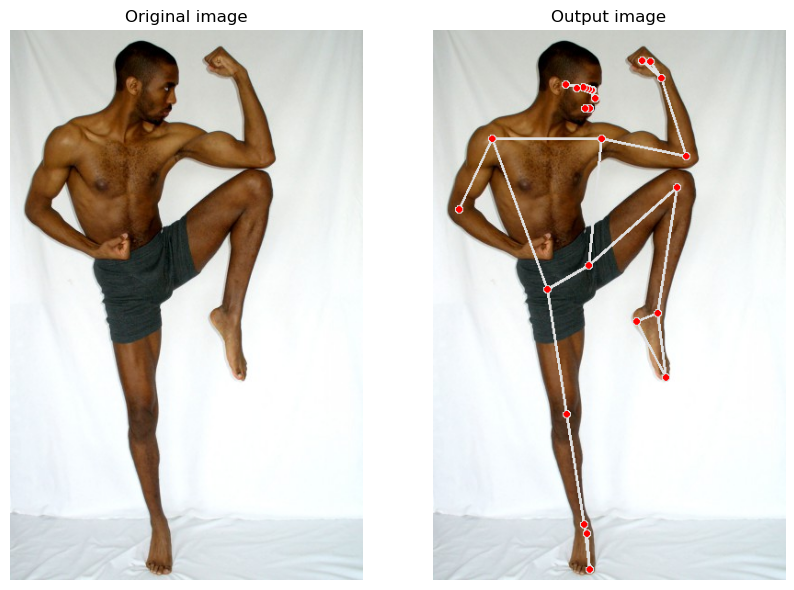

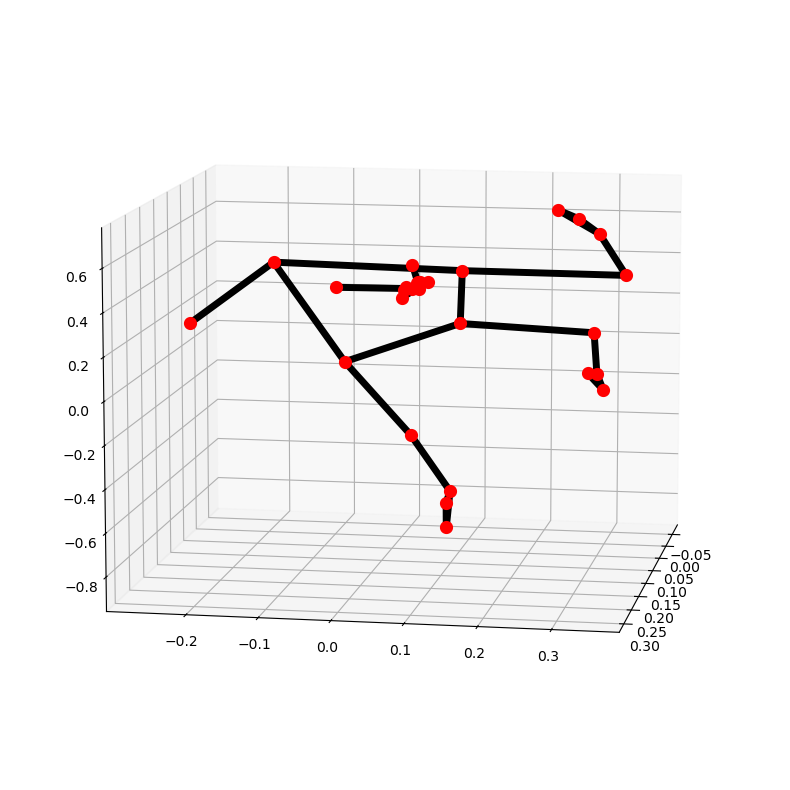

In [72]:
detectPose('./images/test1.jpg', pose)

***Pose detection on video, webcam or download video***

In [ ]:
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Webcam
video = cv2.VideoCapture(1)

# Download video
#video = cv2.VideoCapture('./videos')

cv2.NameWindow('Pose Detection', cv2.WINDOW_NORMAL)

video.set(3, 1280)
video.set(4, 960)

time1 = 0

while video.isOpened():
    ok, frame = video.read()
    
    if not ok: 
        break
        
    # make a flip for making a natural view of selfie
    frame = cv2.flip(frame, 1)
    
    frame_height, frame_width, _ = video.shape
    
    # make the resize of the frame but keeping the aspect ratio
    frame = cv2.resize(frame, int(frame_width * (640/frame_height), 640))
    
    # perform the landmark above the frame
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # set the second time for the fps
    time2= time()
    
    if (time2 - time1) > 0:
        fps = 1.0 / (time2-time1)
        
        cv2.putText(frame, 'FPS {}'.format(int(fps)), (10, 30), cv2.FONT_HERSEY_PLAIN, 2, (0, 255, 0), 3)
        
        # update the time to the real one
        time1 = time2
        
        cv2.imshow('Pose detection', frame)
        
        # make a program to close
        k = cv2.waitKey(1) & 0xFF
        
        # esc key
        if (k == 27):
            break

video.release()
cv2.destroyAllWindows()
